In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import random
import gymnasium as gym
from tqdm import tqdm
from collections import deque
import os
import matplotlib.pyplot as plt
from dyna import DynaAgent, train, plot_qvalues, test
import seaborn as sns

## Create the gym environment

In [2]:
env = gym.make('MountainCar-v0')
discr_step = np.array([0.025, 0.005])

## Define the Dyna agents

In [3]:
model_path = 'dyna_model/'
model_path_large = 'dyna_model_large_bins/'
model_path_small = 'dyna_model_small_bins/'

dyna = DynaAgent(env, discr_step=discr_step, path=model_path)
dyna_large_bins = DynaAgent(env, discr_step=discr_step * 3, path=model_path_large)
dyna_small_bins = DynaAgent(env, discr_step=discr_step / 2, path=model_path_small)

In [5]:
train(env, dyna, n_episodes=3000, log_interval=-1)

100%|██████████| 3000/3000 [01:38<00:00, 30.36it/s]


array([<Axes: xlabel='episode'>, <Axes: xlabel='episode'>,
       <Axes: xlabel='episode'>], dtype=object)

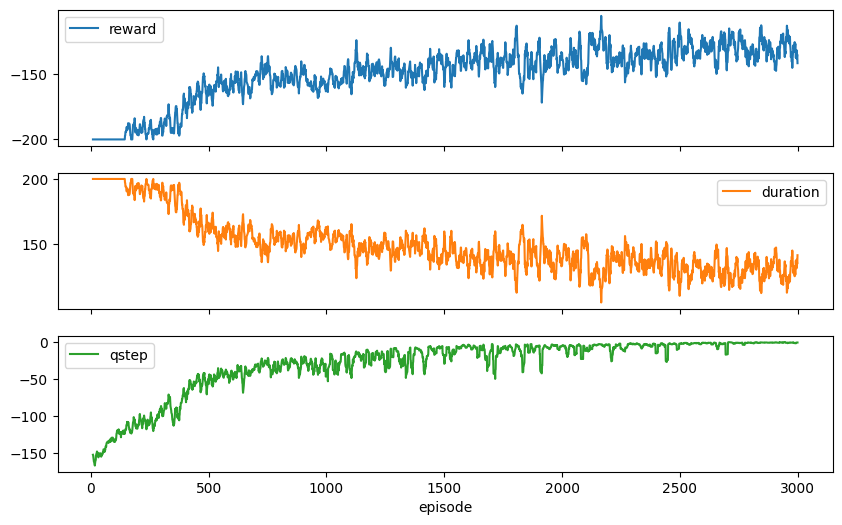

In [4]:
df = pd.read_csv(f'{model_path}episode_results.csv', index_col='episode')
df.rolling(window=10).mean().plot(subplots=True, figsize=(10, 6))

## Does the agent DynaAgent solve the task
Yes. We observe the episode duration is smaller then 200 iterations which shoes the agent managed to get the car to the end goal.

## Run Dyna with large bins

In [8]:
train(env, dyna_large_bins, n_episodes=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

 10%|█         | 312/3000 [00:04<00:33, 81.25it/s]

Episode 299 - Reward: -179.0 - Qvalue step: -15.173581568884853 - Duration: 179


 20%|██        | 613/3000 [00:07<00:25, 94.15it/s]

Episode 599 - Reward: -149.0 - Qvalue step: 6.301807392358635 - Duration: 149


 30%|███       | 913/3000 [00:10<00:22, 91.08it/s]

Episode 899 - Reward: -157.0 - Qvalue step: -2.3693215281612865 - Duration: 157


 41%|████      | 1216/3000 [00:13<00:17, 102.07it/s]

Episode 1199 - Reward: -146.0 - Qvalue step: 0.013282571758708173 - Duration: 146


 51%|█████     | 1519/3000 [00:16<00:15, 94.00it/s] 

Episode 1499 - Reward: -159.0 - Qvalue step: -3.5203594655118096 - Duration: 159


 60%|██████    | 1812/3000 [00:19<00:12, 96.25it/s]

Episode 1799 - Reward: -164.0 - Qvalue step: -2.8443781616819592 - Duration: 164


 70%|███████   | 2115/3000 [00:23<00:09, 95.69it/s]

Episode 2099 - Reward: -145.0 - Qvalue step: -0.6539564591653715 - Duration: 145


 80%|████████  | 2411/3000 [00:26<00:06, 94.25it/s]

Episode 2399 - Reward: -141.0 - Qvalue step: -1.1713304281727375 - Duration: 141


 90%|█████████ | 2713/3000 [00:29<00:02, 98.88it/s] 

Episode 2699 - Reward: -171.0 - Qvalue step: -1.9893967047765813 - Duration: 171


100%|██████████| 3000/3000 [00:32<00:00, 92.90it/s] 


Episode 2999 - Reward: -135.0 - Qvalue step: 0.7725306011616482 - Duration: 135


## Run Dyna with small bins

In [10]:
train(env, dyna_small_bins, n_episodes=3000)

 10%|█         | 300/3000 [01:28<12:58,  3.47it/s]

Episode 299 - Reward: -200.0 - Qvalue step: -166.4606517066961 - Duration: 200


 20%|██        | 600/3000 [02:56<11:47,  3.39it/s]

Episode 599 - Reward: -200.0 - Qvalue step: -141.96787952992645 - Duration: 200


 30%|███       | 900/3000 [04:25<10:30,  3.33it/s]

Episode 899 - Reward: -200.0 - Qvalue step: -138.2752279135565 - Duration: 200


 40%|████      | 1200/3000 [05:55<08:54,  3.37it/s]

Episode 1199 - Reward: -200.0 - Qvalue step: -136.09757795284895 - Duration: 200


 50%|█████     | 1500/3000 [07:24<07:27,  3.35it/s]

Episode 1499 - Reward: -200.0 - Qvalue step: -124.45357455135097 - Duration: 200


 60%|██████    | 1800/3000 [08:52<05:50,  3.42it/s]

Episode 1799 - Reward: -200.0 - Qvalue step: -110.72853179544684 - Duration: 200


 70%|███████   | 2100/3000 [10:21<04:24,  3.40it/s]

Episode 2099 - Reward: -200.0 - Qvalue step: -115.30670123816932 - Duration: 200


 80%|████████  | 2400/3000 [11:50<02:56,  3.39it/s]

Episode 2399 - Reward: -200.0 - Qvalue step: -130.58036350656303 - Duration: 200


 90%|█████████ | 2700/3000 [13:18<01:28,  3.40it/s]

Episode 2699 - Reward: -200.0 - Qvalue step: -114.24144675367646 - Duration: 200


100%|██████████| 3000/3000 [14:45<00:00,  3.39it/s]

Episode 2999 - Reward: -200.0 - Qvalue step: -103.33011575112475 - Duration: 200


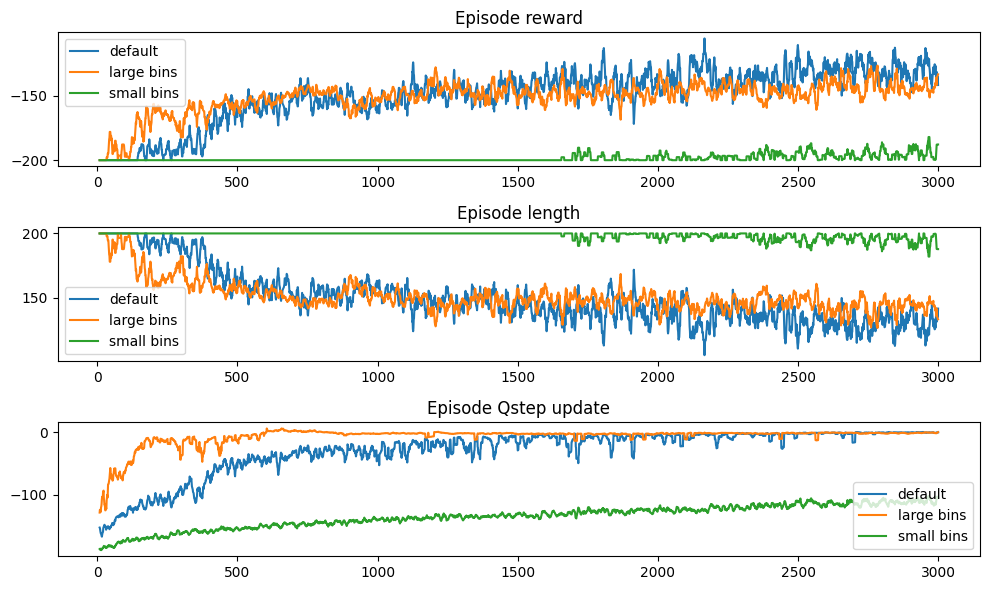

In [32]:
df_default = pd.read_csv(f'{model_path}episode_results.csv', index_col='episode')
df_large = pd.read_csv(f'{model_path_large}episode_results.csv', index_col='episode')
df_small = pd.read_csv(f'{model_path_small}episode_results.csv', index_col='episode')

# Plot the learning curves
fig, axes = plt.subplots(3, 1, figsize=(10, 6))
titles = ['Episode reward', 'Episode length', 'Episode Qstep update']
for i, (cols, ax) in enumerate(zip(df.columns, axes)):
    ax.plot(df_default[cols].rolling(window=10).mean(), label='default')
    ax.plot(df_large[cols].rolling(window=10).mean(), label='large bins')
    ax.plot(df_small[cols].rolling(window=10).mean(), label='small bins')
    ax.set_title(titles[i])
    ax.legend()
plt.tight_layout()
plt.show()

## Changing the size of the discretization step
### Overly large bins
- Loss of Discriminative Power: While the state space might be smaller, each bin represents a larger region of the original continuous space. This can lead to a loss of discriminative power, making it harder for the agent to differentiate between different states within each bin.

- Decreased Learning Efficiency: With fewer distinct states, the agent may struggle to learn an effective policy, especially if important distinctions between states are lost due to coarse discretization. This can result in slower learning and potentially suboptimal policies, hindering the agent's ability to explore the environment efficiently and learn robust policies.

 ### Overly small bins
- Increased Memory and Computation Requirements: With small bins, the state space becomes very large. Storing and processing information about a large number of states requires significant memory and computational resources. This will slow down the learning algortihmn, as it will take much more time for the agent to explore the entire state space in order to yield a performant policy.
It solves it in the first few episodes. Thus the large bin model learns faster then the default one. However, we see that over the learning process,

These caracteristics can be observed in the learning plot. 
- The small bins model takes around 1600 episode to solve the task for the first time. And we see that the learning still hasn't converged after 3000 episodes as the Q values update step isn't close to zero.
- The large bins model solve the learns much faster them the default. It solves the task in the first few iterations which shoes that the agent explored msot of the state space. The Q values converge fast as well, after 700 episodes the Q values update step is close to zero. However, after 3000 epiosdes, we observe that the large bin model performs less good then the defautl one, showing that the agent has learned a suboptimal policy.

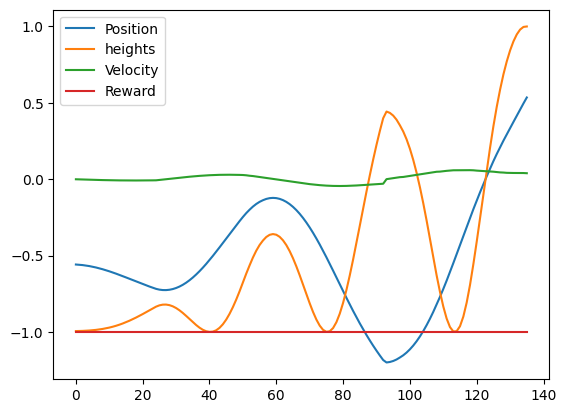

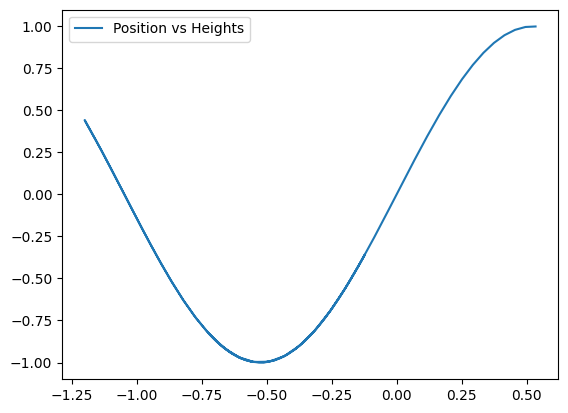

In [72]:
# Test the default agent
dyna = DynaAgent(env, discr_step=discr_step, path=model_path, deterministic=True)
dyna.load()
test(env, dyna)

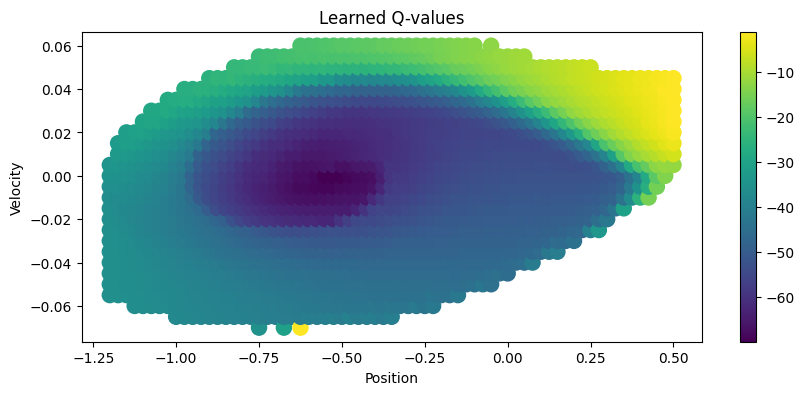

In [41]:
plot_qvalues(model_path, dyna)

In [5]:
# Train default dyna agent for 6000 episodes
model_path_long_train = 'dyna_model_long_train/'
dyna_long_train = DynaAgent(env, discr_step=discr_step, path=model_path_long_train)

In [6]:
train(env, dyna_long_train, n_episodes=6000)

  5%|▌         | 303/6000 [00:13<03:59, 23.77it/s]

Episode 299 - Reward: -200.0 - Qvalue step: -108.17389666919263 - Duration: 200


 10%|█         | 604/6000 [00:24<03:15, 27.56it/s]

Episode 599 - Reward: -150.0 - Qvalue step: -31.895146705295875 - Duration: 150


 15%|█▌        | 904/6000 [00:34<02:45, 30.79it/s]

Episode 899 - Reward: -116.0 - Qvalue step: -7.81357887780775 - Duration: 116


 20%|██        | 1204/6000 [00:44<02:34, 30.98it/s]

Episode 1199 - Reward: -116.0 - Qvalue step: -10.471858703164372 - Duration: 116


 25%|██▌       | 1504/6000 [00:53<02:18, 32.36it/s]

Episode 1499 - Reward: -156.0 - Qvalue step: -14.101654369064175 - Duration: 156


 30%|███       | 1804/6000 [01:02<02:08, 32.60it/s]

Episode 1799 - Reward: -113.0 - Qvalue step: -3.5677750886562247 - Duration: 113


 35%|███▌      | 2105/6000 [01:10<01:36, 40.52it/s]

Episode 2099 - Reward: -129.0 - Qvalue step: -0.49354975204761486 - Duration: 129


 40%|████      | 2407/6000 [01:18<01:34, 38.12it/s]

Episode 2399 - Reward: -107.0 - Qvalue step: 1.1672480681728363 - Duration: 107


 45%|████▌     | 2706/6000 [01:26<01:32, 35.79it/s]

Episode 2699 - Reward: -107.0 - Qvalue step: -0.7615500405340974 - Duration: 107


 50%|█████     | 3007/6000 [01:34<01:22, 36.13it/s]

Episode 2999 - Reward: -148.0 - Qvalue step: -0.5153033899300947 - Duration: 148


 55%|█████▌    | 3304/6000 [01:43<01:14, 36.06it/s]

Episode 3299 - Reward: -93.0 - Qvalue step: -0.7352921140529762 - Duration: 93


 60%|██████    | 3607/6000 [01:51<01:03, 37.60it/s]

Episode 3599 - Reward: -110.0 - Qvalue step: -1.153467873238576 - Duration: 110


 65%|██████▌   | 3904/6000 [01:59<00:57, 36.74it/s]

Episode 3899 - Reward: -141.0 - Qvalue step: 0.22840000895999757 - Duration: 141


 70%|███████   | 4206/6000 [02:08<00:49, 36.23it/s]

Episode 4199 - Reward: -111.0 - Qvalue step: -0.8060436295351376 - Duration: 111


 75%|███████▌  | 4507/6000 [02:16<00:41, 36.16it/s]

Episode 4499 - Reward: -106.0 - Qvalue step: -0.22789887652260044 - Duration: 106


 80%|████████  | 4805/6000 [02:24<00:31, 37.88it/s]

Episode 4799 - Reward: -89.0 - Qvalue step: 0.7538494153994202 - Duration: 89


 85%|████████▌ | 5103/6000 [02:32<00:24, 36.99it/s]

Episode 5099 - Reward: -115.0 - Qvalue step: -0.32331116564533824 - Duration: 115


 90%|█████████ | 5407/6000 [02:40<00:16, 36.34it/s]

Episode 5399 - Reward: -91.0 - Qvalue step: 0.2961355054953394 - Duration: 91


 95%|█████████▌| 5706/6000 [02:48<00:08, 35.59it/s]

Episode 5699 - Reward: -140.0 - Qvalue step: 0.3573108430755998 - Duration: 140


100%|██████████| 6000/6000 [02:56<00:00, 33.91it/s]

Episode 5999 - Reward: -146.0 - Qvalue step: -0.09980642932199713 - Duration: 146


In [13]:
df_long_train = pd.read_csv(f'{model_path_long_train}episode_results.csv', index_col='episode')

# Use plotly for interactive plots as default pandas backend
import plotly.express as px
pd.options.plotting.backend = "plotly"
df_long_train.rolling(window=10).mean().plot()